In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
image=cv2.imread("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\test\\KL-Rahul (3).jpg")
image.shape

(1080, 1080, 3)

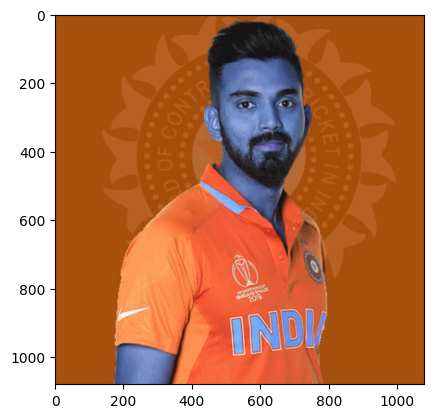

In [3]:
plt.imshow(image)

In [4]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray.shape

(1080, 1080)

In [5]:
gray


array([[71, 71, 71, ..., 71, 71, 71],
       [71, 71, 71, ..., 71, 71, 71],
       [71, 71, 71, ..., 71, 71, 71],
       ...,
       [71, 71, 71, ..., 71, 71, 71],
       [71, 71, 71, ..., 71, 71, 71],
       [71, 71, 71, ..., 71, 71, 71]], dtype=uint8)

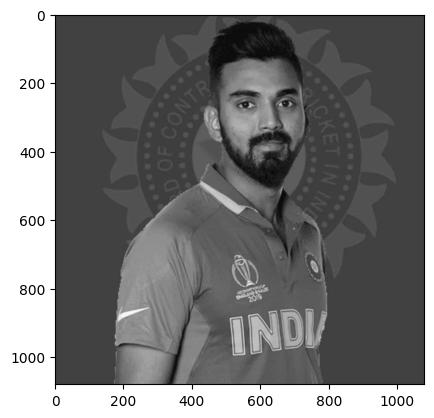

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\opencvhaar\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\opencvhaar\\haarcascades\\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[442, 119, 349, 349]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h


(442, 119, 349, 349)

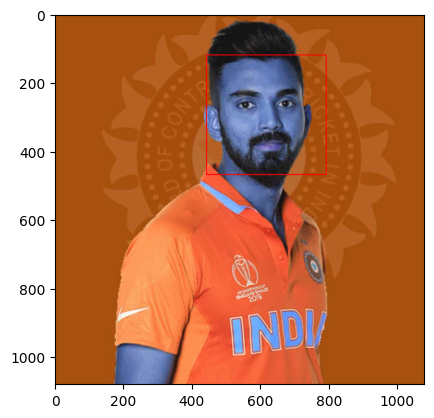

In [9]:
face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

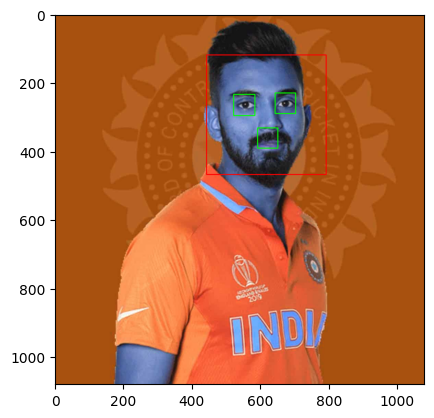

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

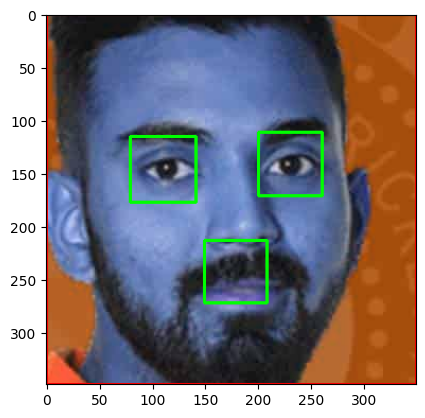

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

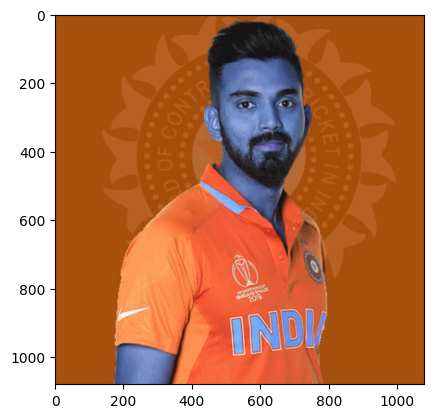

In [13]:
original_image=cv2.imread("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\test\\KL-Rahul (3).jpg")
plt.imshow(original_image)

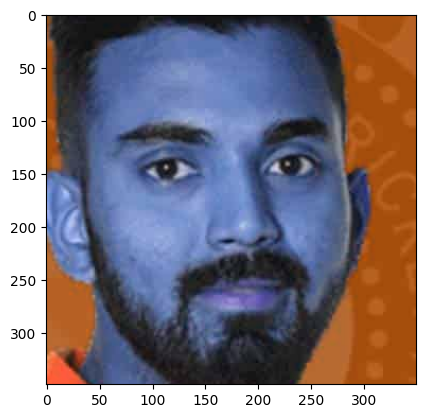

In [27]:
cropped_image=get_cropped_image_if_2_eyes("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\test\\KL-Rahul (3).jpg")
plt.imshow(cropped_image)

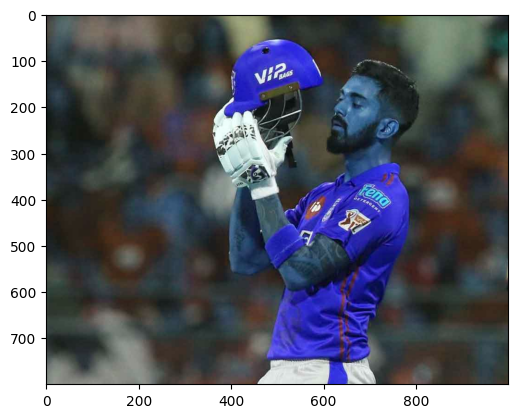

In [15]:
test=cv2.imread("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\test\\k-l-rahul-appointed-kxip-captain-for-ipl-2020-2019-12-19.jpg")
plt.imshow(test)

In [17]:
test_image=get_cropped_image_if_2_eyes("C:\\Users\\Shashank\\Downloads\\jupyter\\imageClassification\\model\\test\\k-l-rahul-appointed-kxip-captain-for-ipl-2020-2019-12-19.jpg")
test_image

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs


['./dataset/bumrah pics',
 './dataset/cropped',
 './dataset/dhoni pics',
 './dataset/kl rahul pics',
 './dataset/rohit sharma pics',
 './dataset/virat kohli pics']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

# Example definitions for required variables
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
path_to_cr_data = 'path_to_cropped_data'  # Update this to the actual path
img_dirs = ['path_to_image_dir1', 'path_to_image_dir2']  # Update these to the actual image directories


Generating cropped images in folder:  ./dataset/cropped/bumrah pics
Error: Unable to read image ./dataset/bumrah pics\India’s Jasprit Bumrah_resources1.jpg
Generating cropped images in folder:  ./dataset/cropped/dhoni pics
Generating cropped images in folder:  ./dataset/cropped/kl rahul pics
Generating cropped images in folder:  ./dataset/cropped/rohit sharma pics
Generating cropped images in folder:  ./dataset/cropped/virat kohli pics


In [25]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

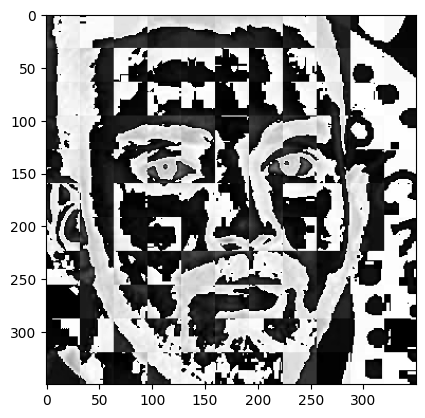

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bumrah pics': ['./dataset/cropped/bumrah pics\\bumrah pics1.png',
  './dataset/cropped/bumrah pics\\bumrah pics10.png',
  './dataset/cropped/bumrah pics\\bumrah pics14.png',
  './dataset/cropped/bumrah pics\\bumrah pics15.png',
  './dataset/cropped/bumrah pics\\bumrah pics17.png',
  './dataset/cropped/bumrah pics\\bumrah pics18.png',
  './dataset/cropped/bumrah pics\\bumrah pics19.png',
  './dataset/cropped/bumrah pics\\bumrah pics2.png',
  './dataset/cropped/bumrah pics\\bumrah pics20.png',
  './dataset/cropped/bumrah pics\\bumrah pics21.png',
  './dataset/cropped/bumrah pics\\bumrah pics23.png',
  './dataset/cropped/bumrah pics\\bumrah pics25.png',
  './dataset/cropped/bumrah pics\\bumrah pics26.png',
  './dataset/cropped/bumrah pics\\bumrah pics6.png',
  './dataset/cropped/bumrah pics\\bumrah pics7.png',
  './dataset/cropped/bumrah pics\\bumrah pics8.png'],
 'dhoni pics': ['./dataset/cropped/dhoni pics\\dhoni pics1.png',
  './dataset/cropped/dhoni pics\\dhoni pics10.png',
  './dat

In [32]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bumrah pics': 0,
 'dhoni pics': 1,
 'kl rahul pics': 2,
 'rohit sharma pics': 3,
 'virat kohli pics': 4}

In [33]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [35]:
len(X)

236

In [36]:
len(X[0])

4096

In [37]:
32*32*3+32*32

4096

In [38]:
X[0]

array([[41],
       [26],
       [24],
       ...,
       [21],
       [20],
       [27]], dtype=uint8)

In [39]:
y[0]

0

In [40]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(236, 4096)

In [41]:
X[0]

array([41., 26., 24., ..., 21., 20., 27.])

In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8135593220338984

In [44]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.80      0.89        10
           2       0.80      0.62      0.70        13
           3       0.83      0.83      0.83        12
           4       0.73      1.00      0.84        19

    accuracy                           0.81        59
   macro avg       0.87      0.77      0.80        59
weighted avg       0.84      0.81      0.81        59



In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.818889,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.751270,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.824603,{'logisticregression__C': 1}


In [48]:
len(X_test)

59

In [49]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_test,y_test)

0.8813559322033898

In [51]:
best_estimators['random_forest'].score(X_test,y_test)


0.7627118644067796

In [52]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.847457627118644

In [53]:
best_clf = best_estimators['svm']


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[ 4,  0,  1,  0,  0],
       [ 0,  8,  0,  0,  2],
       [ 0,  0, 11,  2,  0],
       [ 0,  0,  0, 10,  2],
       [ 0,  0,  0,  0, 19]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

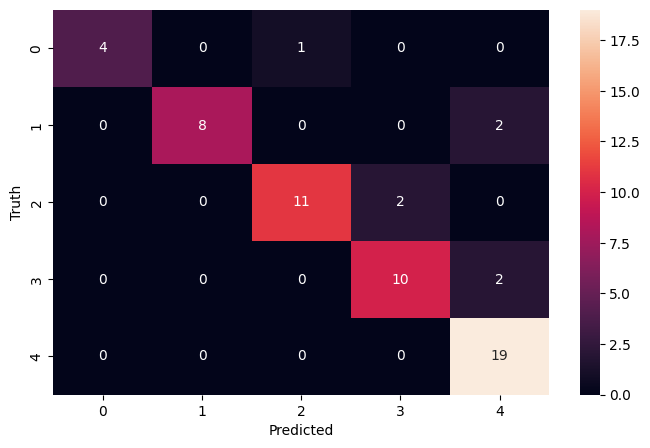

In [61]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
class_dict


{'bumrah pics': 0,
 'dhoni pics': 1,
 'kl rahul pics': 2,
 'rohit sharma pics': 3,
 'virat kohli pics': 4}

In [58]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))